In [15]:
import os
import sys
import pandas as pd
import numpy as np

In [2]:
from psikit import Psikit

In [3]:
pk = Psikit(debug=True,threads=1,memory=16)


  Memory set to  14.901 GiB by Python driver.
  Threads set to 1 by Python driver.


In [8]:
pk.read_from_smiles('CN1C=NC2=C1C(=O)N(C(=O)N2C)C')

In [9]:
pk.optimize()

Optimizer: Optimization complete!


-676.3571157999069

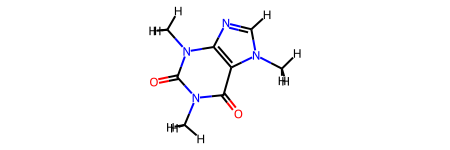

In [10]:
pk.mol

In [11]:
#caculate chages
print(pk.calc_resp_charges())
print(pk.calc_mulliken_charges())
print(pk.calc_lowdin_charges())

[-0.24587141  0.04901257  0.11327409 -0.48760202  0.17052466 -0.09741037
  0.37347865 -0.497169   -0.06043248  0.3822417  -0.52856046 -0.01417697
 -0.00697551 -0.03345719  0.12304844  0.12304844  0.12304844  0.16596044
  0.05453626  0.05453626  0.05453626  0.06146973  0.06146973  0.06146973]
[-0.11403803 -0.69383148  0.38633764 -0.62281386  0.63501693  0.09321197
  0.89983415 -0.63014528 -0.87909509  1.09567053 -0.62723456 -0.87749254
 -0.12044038 -0.1234218   0.16760136  0.12972097  0.16697335  0.18241471
  0.14987671  0.16746525  0.14801271  0.14594889  0.14531624  0.1751116 ]
[-0.13209257 -0.05336874  0.07982941 -0.27601555  0.1409561  -0.12481149
  0.29161806 -0.3935748  -0.18634657  0.34620876 -0.39781316 -0.15229553
 -0.13288231 -0.13930474  0.11764798  0.10363632  0.11653779  0.12028649
  0.10798025  0.12049351  0.10849203  0.10611954  0.10707795  0.12162127]


In [12]:
mol = pk.mol
atoms = mol.GetAtoms()

In [13]:
data = {'Symbol':[atom.GetSymbol() for atom in atoms],
        'RESP': [float(atom.GetProp('RESP')) for atom in atoms],
        'MULLIKEN': [float(atom.GetProp('MULLIKEN')) for atom in atoms],
       'LOWDIN':  [float(atom.GetProp('LOWDIN')) for atom in atoms]}

In [16]:
df = pd.DataFrame(data)

In [17]:
df.round(3)

,Symbol,RESP,MULLIKEN,LOWDIN
0,C,-0.246,-0.114,-0.132
1,N,0.049,-0.694,-0.053
2,C,0.113,0.386,0.080
3,N,-0.488,-0.623,-0.276
4,C,0.171,0.635,0.141
5,C,-0.097,0.093,-0.125
6,C,0.373,0.900,0.292
7,O,-0.497,-0.630,-0.394
8,N,-0.060,-0.879,-0.186
9,C,0.382,1.096,0.346


In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

In [19]:
plt.style.use('ggplot')

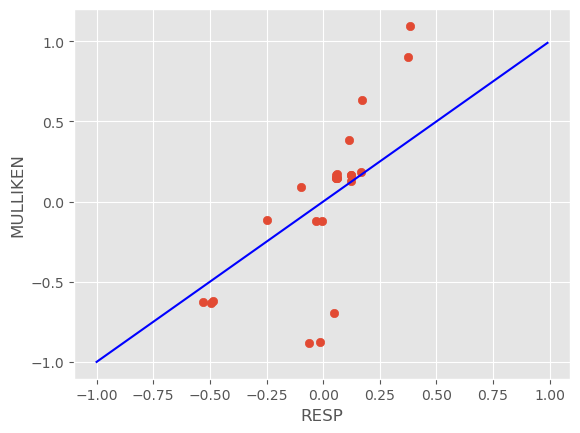

In [20]:
# RESP charge and MULLIKEN charge shows high correlation
plt.scatter(df.RESP, df.MULLIKEN)
plt.xlabel('RESP')
plt.ylabel('MULLIKEN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

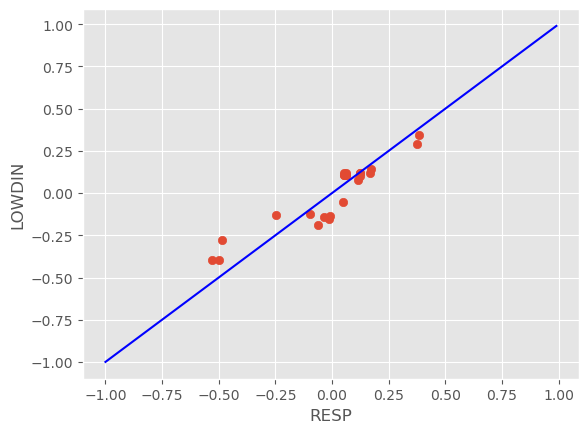

In [21]:
plt.scatter(df.RESP, df.LOWDIN)
plt.xlabel('RESP')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')

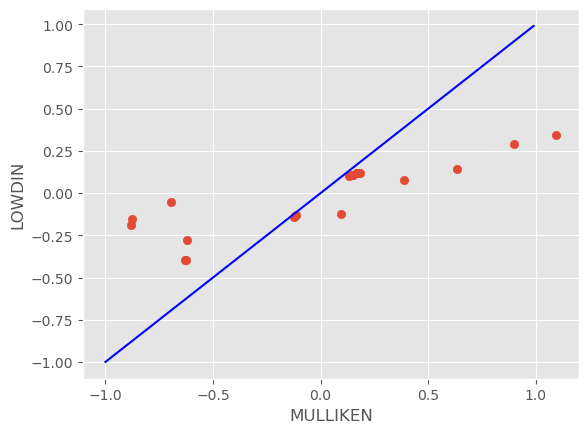

In [22]:
plt.scatter(df.MULLIKEN, df.LOWDIN)
plt.xlabel('MULLIKEN')
plt.ylabel('LOWDIN')
plt.plot(np.arange(-1.0, 1.0, 0.01), np.arange(-1.0, 1.0, 0.01), c='b')